In [65]:
import numpy as np

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
import pandas as pd
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict

#Loading datasets

In [67]:
tictac_data_single = np.loadtxt('tictac_single.txt')
X = tictac_data_single[:,:9]
y = tictac_data_single[:,9]
y

array([6., 1., 2., ..., 2., 0., 4.])

In [68]:
X_shuffled_single, y_shuffled_single = shuffle(X, y, random_state=42)
X_train_single, X_test_single, y_train_single, y_test_single = train_test_split(X_shuffled_single, y_shuffled_single, test_size=0.2)

In [69]:
tictac_data_final = np.loadtxt('tictac_final.txt')
X = tictac_data_final[:,:9]
y = tictac_data_final[:,9]
y

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.

In [70]:
X_shuffled_final, y_shuffled_final = shuffle(X, y, random_state=42)
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X_shuffled_final, y_shuffled_final, test_size=0.2)

In [71]:
tictac_data_multi = np.loadtxt('tictac_multi.txt')
X = tictac_data_multi[:,:9]
y = tictac_data_multi[:,9:]
# change how picking last nine, change loading
#np.sum(y == 1, axis=1)
print(y.shape[0])
y

6551


array([[0., 0., 0., ..., 1., 0., 1.],
       [0., 1., 0., ..., 1., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [72]:
X_shuffled_multi, y_shuffled_multi = shuffle(X, y, random_state=42)
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_shuffled_multi, y_shuffled_multi, test_size=0.2)
#np.set_printoptions(threshold=np.inf)
#print(y_test_multi)
from IPython.display import display
display(y_test_multi)
print(y_test_multi.shape)

array([[1., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

(1311, 9)


In [73]:
def svm_model(X_train, y_train, X_test, y_test):
  svm_model = SVC(kernel='linear')
  svm_model.fit(X_train, y_train)
  y_pred = svm_model.predict(X_test)
  svm_accuracy = cross_val_score(svm_model, X_train, y_train, cv=10, scoring="accuracy").mean()
  conf_matrix = confusion_matrix(y_test, y_pred, normalize = "true")
  print(f"SVM(Linear) Accuracy: {svm_accuracy}")
  print("Confusion Matrix:")
  print(conf_matrix)

  y_train_pred = cross_val_predict(svm_model, X_train, y_train, cv=10)
  plt.rc('font', size=9)
  ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
  plt.show()
  plt.rc('font', size=10)
  ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,
                                        normalize="true", values_format=".0%")
  plt.show()
  return

#SVM using single dataset

SVM(Linear) Accuracy: 0.3641221374045801
Confusion Matrix:
[[1.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.56213018 0.13017751 0.08284024 0.         0.22485207 0.         0.         0.         0.        ]
 [0.5978836  0.         0.27513228 0.         0.12698413 0.         0.         0.         0.        ]
 [0.55813953 0.10465116 0.05813953 0.04651163 0.23255814 0.         0.         0.         0.        ]
 [0.60185185 0.         0.         0.         0.39814815 0.         0.         0.         0.        ]
 [0.60294118 0.13235294 0.10294118 0.         0.14705882 0.         0.01470588 0.         0.        ]
 [0.51351351 0.07207207 0.0990991  0.07207207 0.24324324 0.         0.         0.         0.        ]
 [0.70588235 0.1372549  0.09803922 0.         0.05882353 0.         0.         0.         0.        ]
 [0.58181818 0.17272727 0.09090909 0.         0.1        0.         0.01818182 0.         0.03636364]]


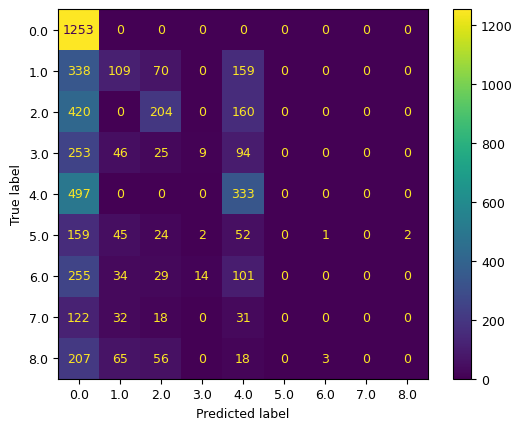

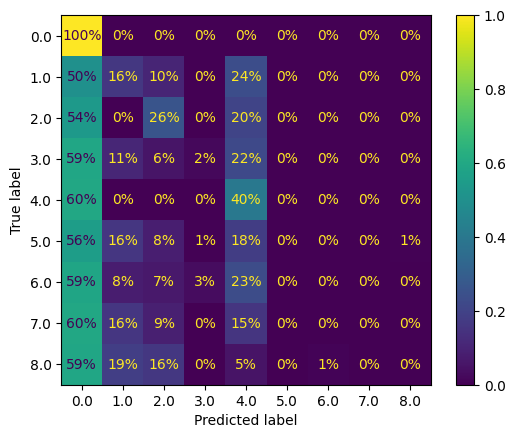

In [74]:
svm_model(X_train_single, y_train_single, X_test_single, y_test_single)

d

#SVM using final dataset

SVM(Linear) Accuracy: 0.9856117566643882
Confusion Matrix:
[[0.91803279 0.08196721]
 [0.         1.        ]]


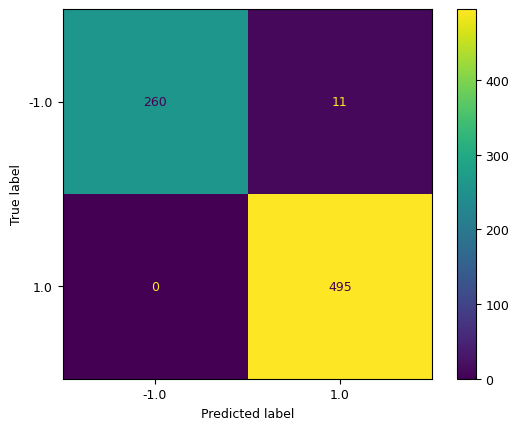

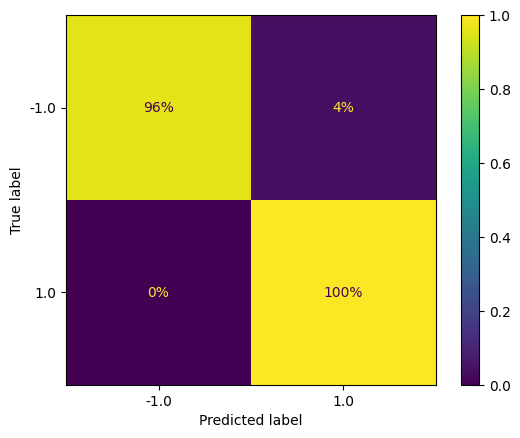

In [75]:
svm_model(X_train_final, y_train_final, X_test_final, y_test_final)

In [76]:
from sklearn.neighbors import KNeighborsClassifier

In [77]:
def knn_model(X_train, y_train, X_test, y_test):
  knn_model = KNeighborsClassifier(n_neighbors=5)
  knn_model.fit(X_train, y_train)
  y_pred = knn_model.predict(X_test)
  knn_accuracy = cross_val_score(knn_model, X_train, y_train, cv=10, scoring="accuracy").mean()
  #knn_accuracy = accuracy_score(y_test, y_pred)
  conf_matrix = confusion_matrix(y_test, y_pred, normalize = "true")
  print(f"KNN Accuracy: {knn_accuracy}")
  print("Confusion Matrix:")
  print(conf_matrix)
  y_train_pred = cross_val_predict(knn_model, X_train, y_train, cv=10)
  plt.rc('font', size=9)
  ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
  plt.show()
  plt.rc('font', size=10)
  ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,
                                        normalize="true", values_format=".0%")
  plt.show()
  return

#KneighborsClassifier - single dataset

KNN Accuracy: 0.7404580152671756
Confusion Matrix:
[[0.87138264 0.0096463  0.02572347 0.         0.03858521 0.01286174 0.01607717 0.0096463  0.01607717]
 [0.03550296 0.75147929 0.08284024 0.0295858  0.05325444 0.01183432 0.02366864 0.00591716 0.00591716]
 [0.08994709 0.03174603 0.8042328  0.01587302 0.03174603 0.01587302 0.01058201 0.         0.        ]
 [0.08139535 0.04651163 0.04651163 0.70930233 0.03488372 0.03488372 0.02325581 0.         0.02325581]
 [0.09722222 0.03703704 0.07407407 0.03703704 0.73148148 0.00925926 0.         0.         0.01388889]
 [0.         0.13235294 0.04411765 0.04411765 0.02941176 0.60294118 0.05882353 0.02941176 0.05882353]
 [0.06306306 0.02702703 0.08108108 0.04504505 0.05405405 0.01801802 0.68468468 0.00900901 0.01801802]
 [0.09803922 0.05882353 0.         0.05882353 0.01960784 0.03921569 0.03921569 0.66666667 0.01960784]
 [0.10909091 0.06363636 0.02727273 0.05454545 0.04545455 0.01818182 0.         0.00909091 0.67272727]]


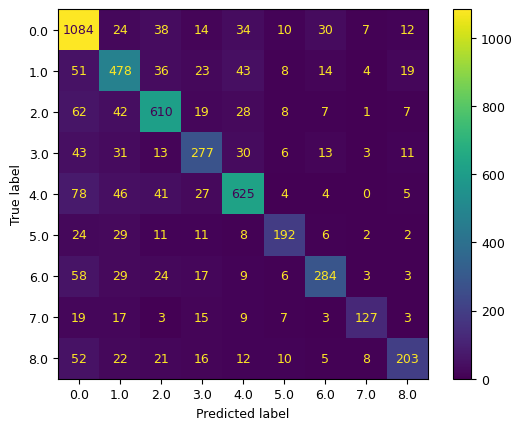

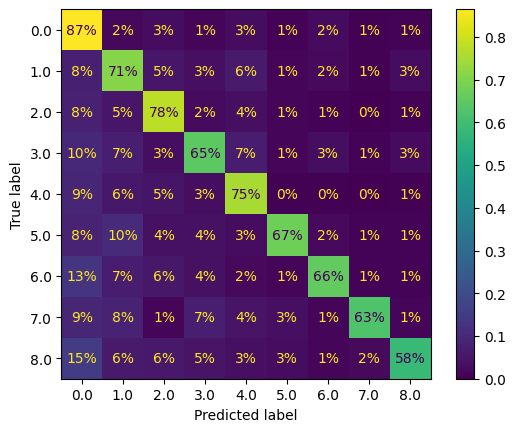

In [78]:
knn_model(X_train_single, y_train_single, X_test_single, y_test_single)

#KneighborsClassifier - final dataset

KNN Accuracy: 0.9960697197539303
Confusion Matrix:
[[0.98360656 0.01639344]
 [0.         1.        ]]


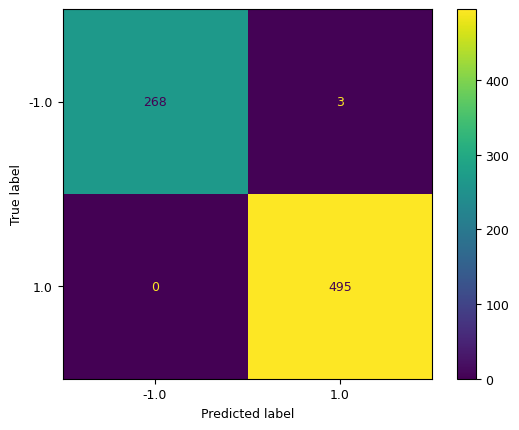

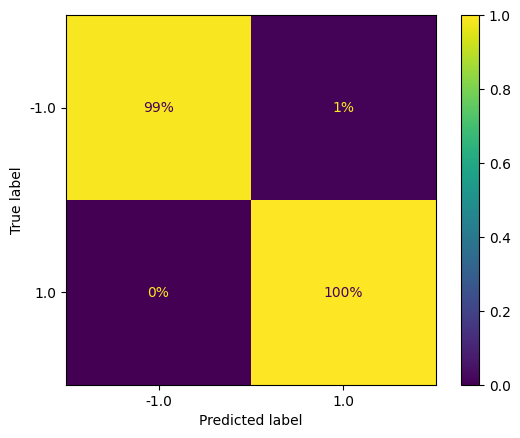

In [79]:
knn_model(X_train_final, y_train_final, X_test_final, y_test_final)

In [80]:
from sklearn.neural_network import MLPClassifier

In [81]:
def mlp_model(X_train, y_train, X_test, y_test):
  mlp_model = MLPClassifier(hidden_layer_sizes=(128, 32), max_iter=100)
  mlp_model.fit(X_train, y_train)
  y_pred = mlp_model.predict(X_test)
  mlp_accuracy = cross_val_score(mlp_model, X_train, y_train, cv=10, scoring="accuracy").mean()
  conf_matrix = confusion_matrix(y_test, y_pred, normalize = "true")
  print(f"Multilayer Perceptron Accuracy: {mlp_accuracy}")
  print("Confusion Matrix:")
  print(conf_matrix)
  y_train_pred = cross_val_predict(mlp_model, X_train, y_train, cv=10)
  plt.rc('font', size=9)
  ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
  plt.show()
  plt.rc('font', size=10)
  ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,
                                        normalize="true", values_format=".0%")
  plt.show()
  return

#Multilayer Perceptron - single dataset

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Multilayer Perceptron Accuracy: 0.8767175572519085
Confusion Matrix:
[[0.93890675 0.00321543 0.0096463  0.00643087 0.01607717 0.00643087 0.00321543 0.0096463  0.00643087]
 [0.01775148 0.84615385 0.04733728 0.02366864 0.03550296 0.01183432 0.01183432 0.         0.00591716]
 [0.03174603 0.02116402 0.84126984 0.02116402 0.04761905 0.01587302 0.01587302 0.00529101 0.        ]
 [0.04651163 0.01162791 0.01162791 0.84883721 0.02325581 0.02325581 0.02325581 0.         0.01162791]
 [0.02314815 0.00925926 0.02777778 0.02314815 0.90277778 0.         0.00925926 0.         0.00462963]
 [0.01470588 0.02941176 0.01470588 0.01470588 0.02941176 0.82352941 0.01470588 0.05882353 0.        ]
 [0.03603604 0.00900901 0.03603604 0.01801802 0.00900901 0.         0.86486486 0.00900901 0.01801802]
 [0.         0.         0.         0.05882353 0.         0.01960784 0.         0.90196078 0.01960784]
 [0.03636364 0.04545455 0.00909091 0.         0.00909091 0.03636364 0.         0.         0.86363636]]


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

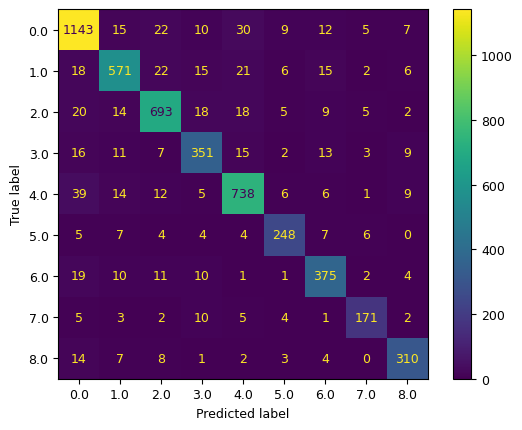

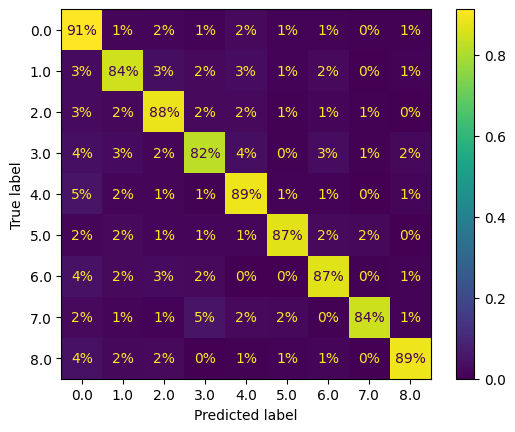

In [82]:
mlp_model(X_train_single, y_train_single, X_test_single, y_test_single)

#Multilayer Perceptron - Final


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Multilayer Perceptron Accuracy: 0.9882262474367737
Confusion Matrix:
[[0.91803279 0.08196721]
 [0.         1.        ]]


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

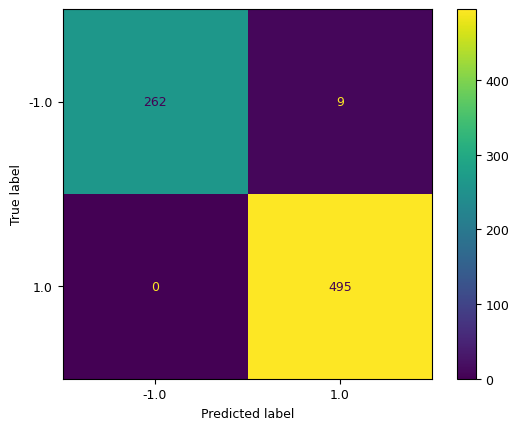

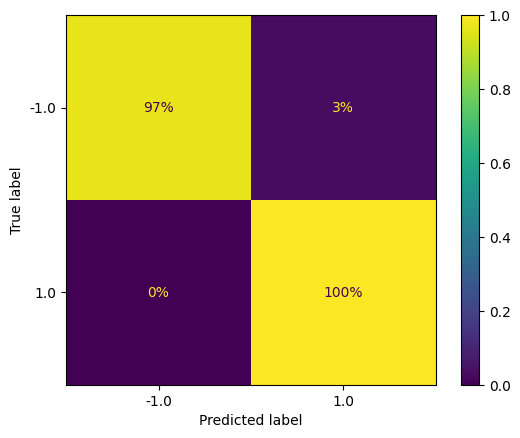

In [83]:
mlp_model(X_train_final, y_train_final, X_test_final, y_test_final)

#KNN Regression - multi

In [84]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import r2_score

In [85]:
knn_regressor = KNeighborsRegressor(n_neighbors=5)

In [86]:
#multioutput_knn = MultiOutputRegressor(knn_regressor)
#y_train_multi = y_train_multi.reshape(-1, 1)
#y_train_multi = np.tile(y_train_multi, (1, 9))
#multioutput_knn.fit(X_train_multi, y_train_multi)
knn_regressor.fit(X_train_multi, y_train_multi)

KNeighborsRegressor()

In [87]:
y_pred = knn_regressor.predict(X_test_multi)
#knn_pred = np.round(multioutput_knn.predict(X_test_multi))

In [88]:
#knn_r2_score = mean_squared_error(y_test, y_pred)
knn_r2_score = cross_val_score(knn_regressor, X_shuffled_multi, y_shuffled_multi, cv=10, scoring="r2").mean()
#knn_r2_score = r2_score(y_test_multi, knn_pred)
#conf_matrix = confusion_matrix(y_test, y_pred)

In [89]:
print(f"KNN Regressor Accuracy: {knn_r2_score }")

KNN Regressor Accuracy: 0.5832841824144476


In [90]:
#print("Confusion Matrix:")
#print(conf_matrix)

#Linear Regression - multi

In [91]:
from sklearn.linear_model import LinearRegression

In [92]:
#linear_regressor = LinearRegression()
linear_models = []

In [93]:
#linear_regressor.fit(X_train_multi, y_train_multi)
for i in range(9):
  linear_regressor = LinearRegression()
  linear_regressor.fit(X_train_multi, y_train_multi[:, i])
  linear_models.append(linear_regressor)


In [94]:
#y_pred = linear_regressor.predict(X_test_multi)
np.set_printoptions(linewidth=np.inf)
linear_outputs = np.array([np.round(model.predict(X_test_multi)) for model in linear_models]).T
linear_pred = np.argmax(linear_outputs, axis=1)
print(linear_outputs)
print(linear_pred)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[0 0 0 ... 0 0 0]


In [95]:
#linear_r2_score = cross_val_score(linear_regressor, X_train_multi, X_train_multi, cv=10, scoring="r2").mean()
linear_accuracy = accuracy_score(np.argmax(y_test_multi, axis=1), linear_pred)

In [96]:
print(f"Linear Regression Accuracy: {linear_accuracy }")

Linear Regression Accuracy: 0.22654462242562928


# Multilayer Regression - Multi

In [97]:
from sklearn.neural_network import MLPRegressor

In [111]:
mlp_regressor = MLPRegressor(hidden_layer_sizes=(128, 32), activation='relu', max_iter=100, random_state=42) #128,
#mlp_regressor = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

In [112]:
mlp_regressor.fit(X_train_multi, y_train_multi)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(activation='tanh', hidden_layer_sizes=(128, 32), max_iter=100,
             random_state=42)

In [113]:
y_pred = mlp_regressor.predict(X_test_multi) # do osmething like this for linear no need for mlp

In [114]:
# consider using root mean square error, no confusion matrix
mlp_r2_score = cross_val_score(mlp_regressor, X_shuffled_multi, y_shuffled_multi, cv=10, scoring="r2").mean()

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

In [102]:
print(f"Multilayer Regression Accuracy: {mlp_r2_score }")

Multilayer Regression Accuracy: 0.6276074011988595


#Linear Regression - Normal Equation (Extra Credit)

In [103]:
#From textbook
from sklearn.preprocessing import add_dummy_feature


X_b = add_dummy_feature(X_train_multi)  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y_train_multi

In [104]:
theta_best

array([[ 0.2496403 ,  0.16893416,  0.24347441,  0.17685511,  0.2887558 ,  0.17468782,  0.24984327,  0.1738713 ,  0.24097948],
       [-0.02435706,  0.0219789 ,  0.00401376,  0.00366428,  0.01019722,  0.02697643, -0.01449908,  0.02197485,  0.01029396],
       [-0.00528714, -0.01821928, -0.00343604,  0.01937254, -0.00207434,  0.01652474, -0.02257438, -0.00569735, -0.01096776],
       [-0.01271264,  0.00847497, -0.02208607,  0.02770975,  0.00908393,  0.01310314,  0.00288932,  0.02881427, -0.00915991],
       [-0.00786711,  0.01922542, -0.02454194, -0.01580242,  0.00641146, -0.01144291, -0.00616691,  0.01643825, -0.0042401 ],
       [-0.01169564,  0.01882351,  0.00533592,  0.01475628, -0.01204564,  0.0064321 , -0.00447154,  0.01909336, -0.00164985],
       [-0.02641112,  0.01779654, -0.00586256, -0.00681792,  0.0044169 , -0.01961015, -0.01079996,  0.00801524, -0.00914171],
       [-0.01399229,  0.02862777,  0.01654649,  0.00290682,  0.00827977,  0.02416119, -0.03736365,  0.01237358, -0.003

In [105]:
X_train_single, X_test_single, y_train_single, y_test_single = train_test_split(X_shuffled_single, y_shuffled_single, test_size=0.9)

SVM(Linear) Accuracy: 0.4318414918414918
Confusion Matrix:
[[1.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.1124498  0.49263722 0.00803213 0.         0.38688086 0.         0.         0.         0.        ]
 [0.18510158 0.25620767 0.19074492 0.         0.36117381 0.         0.00677201 0.         0.        ]
 [0.16129032 0.21075269 0.06236559 0.03870968 0.4688172  0.         0.04946237 0.00860215 0.        ]
 [0.28311966 0.12286325 0.08440171 0.         0.49786325 0.00106838 0.01068376 0.         0.        ]
 [0.23692308 0.22769231 0.11384615 0.02769231 0.37230769 0.00307692 0.01846154 0.         0.        ]
 [0.25609756 0.22764228 0.04065041 0.00406504 0.39430894 0.0101626  0.05894309 0.         0.00813008]
 [0.31877729 0.13537118 0.13100437 0.0349345  0.34934498 0.         0.01746725 0.01310044 0.        ]
 [0.27777778 0.28019324 0.13768116 0.00966184 0.26086957 0.00724638 0.00724638 0.00241546 0.01690821]]


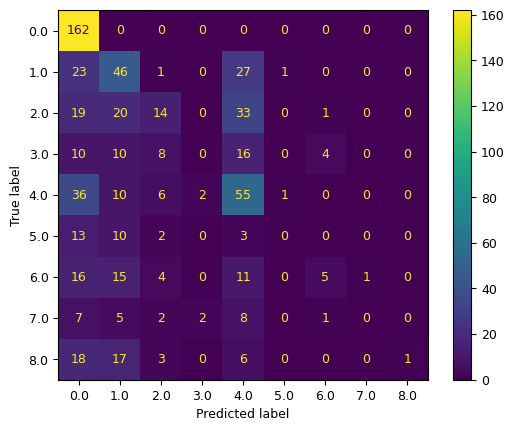

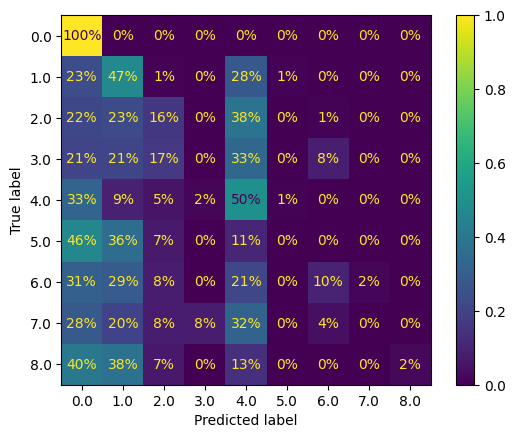

In [106]:
svm_model(X_train_single, y_train_single, X_test_single, y_test_single)

KNN Accuracy: 0.5846153846153845
Confusion Matrix:
[[0.81455064 0.0256776  0.0235378  0.01640514 0.07203994 0.01212553 0.01854494 0.00356633 0.01355207]
 [0.16465863 0.64524766 0.05087015 0.03748327 0.06291834 0.00401606 0.01874163 0.00937082 0.00669344]
 [0.18735892 0.11399549 0.54401806 0.01467269 0.07900677 0.00790068 0.02595937 0.00790068 0.01918736]
 [0.18494624 0.12473118 0.07096774 0.41935484 0.09247312 0.00860215 0.05591398 0.02150538 0.02150538]
 [0.16666667 0.11431624 0.0715812  0.01388889 0.60683761 0.0042735  0.01068376 0.00854701 0.00320513]
 [0.25846154 0.15384615 0.12       0.05846154 0.12       0.21538462 0.00615385 0.02769231 0.04      ]
 [0.21747967 0.09756098 0.06300813 0.06300813 0.13211382 0.0101626  0.38211382 0.02235772 0.01219512]
 [0.22707424 0.14847162 0.069869   0.0349345  0.11790393 0.00873362 0.069869   0.30131004 0.02183406]
 [0.24154589 0.12560386 0.06038647 0.00966184 0.11111111 0.01690821 0.02657005 0.02657005 0.38164251]]


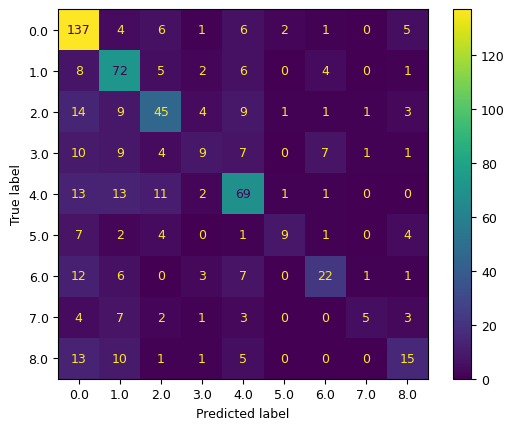

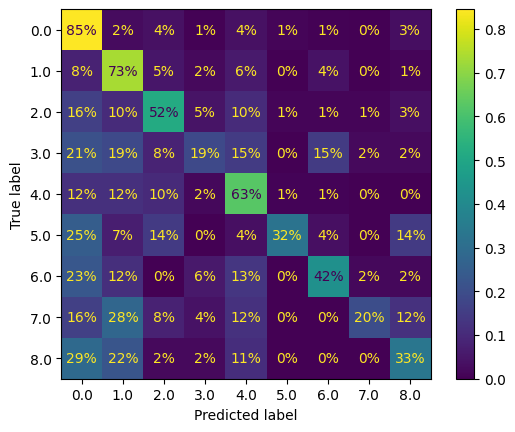

In [107]:
knn_model(X_train_single, y_train_single, X_test_single, y_test_single)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Multilayer Perceptron Accuracy: 0.6531934731934731
Confusion Matrix:
[[0.89586305 0.01141227 0.01212553 0.00784593 0.04850214 0.0042796  0.01426534 0.0021398  0.00356633]
 [0.0562249  0.7416332  0.07630522 0.00535475 0.05354752 0.01338688 0.02945114 0.00669344 0.01740295]
 [0.11963883 0.04063205 0.67607223 0.01241535 0.04740406 0.03386005 0.04853273 0.00225734 0.01918736]
 [0.08172043 0.12258065 0.04086022 0.32903226 0.15913978 0.05806452 0.10537634 0.03655914 0.06666667]
 [0.0715812  0.07905983 0.04166667 0.01923077 0.76388889 0.00213675 0.01388889 0.00641026 0.00213675]
 [0.08307692 0.11384615 0.06461538 0.18461538 0.10153846 0.27692308 0.07076923 0.01846154 0.08615385]
 [0.15853659 0.04471545 0.05487805 0.06097561 0.05081301 0.0203252  0.56910569 0.0203252  0.0203252 ]
 [0.19213974 0.12227074 0.04366812 0.11353712 0.06113537 0.02620087 0.06113537 0.30131004 0.07860262]
 [0.17391304 0.07004831 0.01932367 0.03140097 0.07729469 0.00483092 0.02657005 0.03140097 0.56521739]]


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

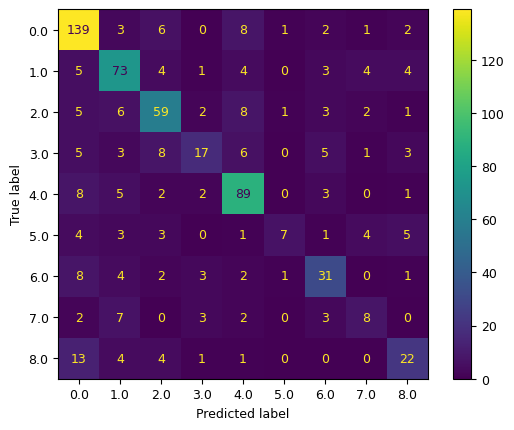

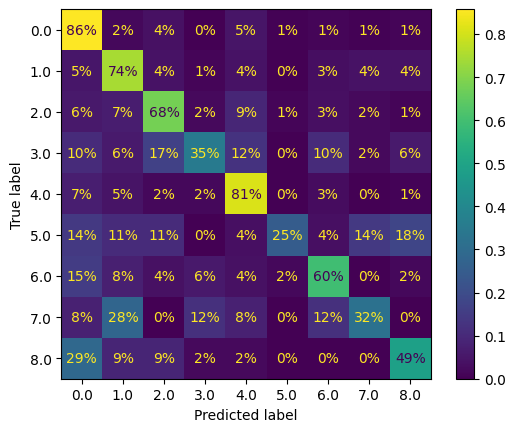

In [108]:
mlp_model(X_train_single, y_train_single, X_test_single, y_test_single)